<a href="https://colab.research.google.com/github/HeerRawal0138pg/Final-Class-Quiz---Heer-R/blob/main/Class%20Quiz%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Step 1: Upload file manually
uploaded = files.upload()

# Step 2: Read CSV file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Step 3: Analyze room types
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room_type', palette='viridis', order=df['room_type'].value_counts().index)
plt.title('Distribution of Room Types on Airbnb')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


KeyboardInterrupt: 

<ipython-input-2-2cb03781cbc2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_type', palette='viridis', order=df['room_type'].value_counts().index)


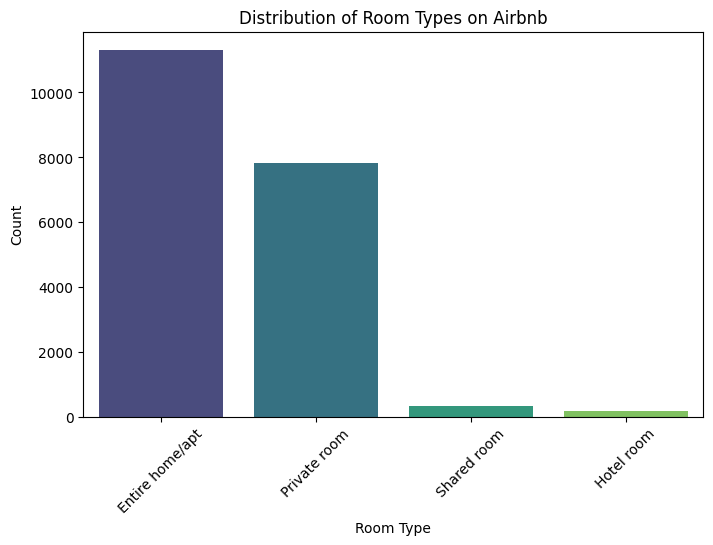

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/listings_detailed.csv')

# Analyze room types
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='room_type', palette='viridis', order=df['room_type'].value_counts().index)
plt.title('Distribution of Room Types on Airbnb')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-3-77773dd8e251>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=neighborhood_counts.head(20), x='neighbourhood', y='count', palette='coolwarm')


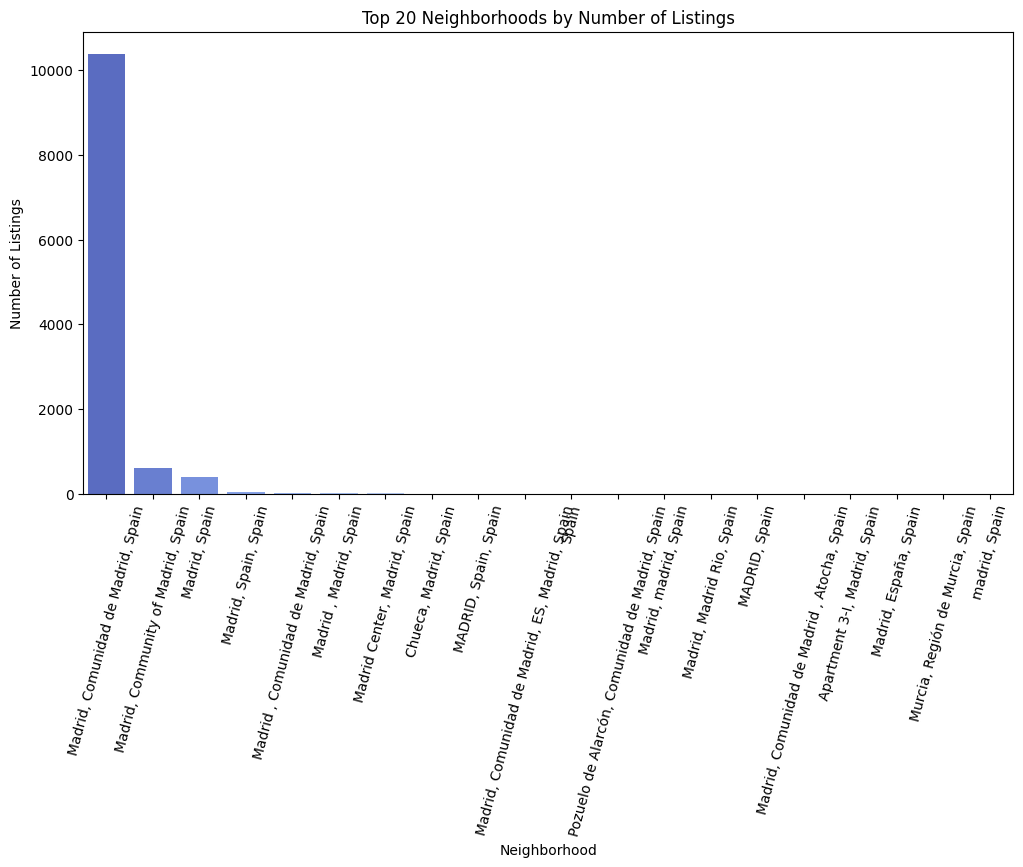

In [3]:
# Count listings per neighborhood
neighborhood_counts = df['neighbourhood'].value_counts().reset_index()
neighborhood_counts.columns = ['neighbourhood', 'count']

# Plot top neighborhoods
plt.figure(figsize=(12, 6))
sns.barplot(data=neighborhood_counts.head(20), x='neighbourhood', y='count', palette='coolwarm')
plt.title('Top 20 Neighborhoods by Number of Listings')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=75)
plt.show()


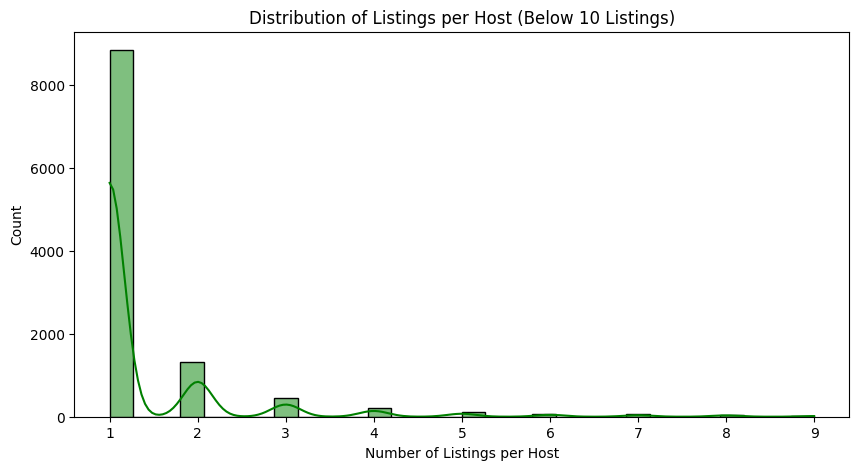

Number of hosts with more than 5 listings: 371


In [4]:
# Count listings per host
host_listing_counts = df['host_id'].value_counts()

# Plot distribution of listings per host
plt.figure(figsize=(10, 5))
sns.histplot(host_listing_counts[host_listing_counts < 10], bins=30, kde=True, color='green')
plt.title('Distribution of Listings per Host (Below 10 Listings)')
plt.xlabel('Number of Listings per Host')
plt.ylabel('Count')
plt.show()

# Print multi-property owners
multi_property_hosts = (host_listing_counts > 5).sum()
print(f"Number of hosts with more than 5 listings: {multi_property_hosts}")


In [6]:
# Detect language in `name` column
df['language'] = df['name'].apply(lambda x: langdetect.detect(x) if isinstance(x, str) else 'unknown')

# Compare average prices
price_comparison = df.groupby('language')['price'].mean().sort_values()

# Plot comparison
plt.figure(figsize=(10,5))
sns.barplot(x=price_comparison.index, y=price_comparison.values, palette='coolwarm')
plt.title('Average Price by Listing Language')
plt.xlabel('Language')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


NameError: name 'langdetect' is not defined

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select relevant columns
features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
df_selected = df[features + ['price']].copy()

# Convert columns to numeric
for col in features + ['price']:
    df_selected[col] = pd.to_numeric(df_selected[col], errors='coerce')

# Fill missing values with median instead of dropping all
df_selected = df_selected.fillna(df_selected.median())

# Define X and y
X = df_selected[features]
y = df_selected['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Visualizing feature importance
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
plt.figure(figsize=(8,5))
sns.barplot(data=coefficients, x='Feature', y='Coefficient', palette='magma')
plt.title('Feature Importance in Predicting Price')
plt.xticks(rotation=45)
plt.show()




ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values